In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install sktime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 15.1 MB/s eta 0:00:00


In [ ]:
from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.theta import ThetaForecaster
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
import pandas as pd
from sktime.utils.plotting import plot_series
import sys
from sklearn.metrics import mean_absolute_error, r2_score
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.fbprophet import Prophet # from facebook
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings("ignore")
# sys.path.append("..")
# import src.utility.plot_settings

####**Airline Forecast**

In [ ]:
y = pd.DataFrame(load_airline())
y

,Number of airline passengers
Period,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0
...,...
1960-08,606.0
1960-09,508.0
1960-10,461.0


<Axes: xlabel='Period'>

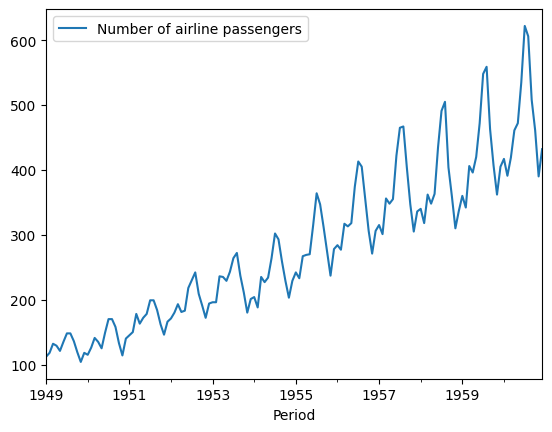

In [ ]:
y.plot()

There is a big increase in the number of airline passengers over the period

In [ ]:
y_train, y_test = temporal_train_test_split(y, train_size=0.8)

In [ ]:
# https://www.sktime.org/en/stable/get_started.html

fh = ForecastingHorizon(y_test.index, is_relative=False)
# monthly seasonal periodicity,
# sp = Seasonal period: 1=Yearly, 12=monthly, 4=quarterly
forecaster = ThetaForecaster(sp=12)
forecaster.fit(y_train)

ThetaForecaster(sp=12)

In [ ]:
fh

ForecastingHorizon(['1958-08', '1958-09', '1958-10', '1958-11', '1958-12', '1959-01',
             '1959-02', '1959-03', '1959-04', '1959-05', '1959-06', '1959-07',
             '1959-08', '1959-09', '1959-10', '1959-11', '1959-12', '1960-01',
             '1960-02', '1960-03', '1960-04', '1960-05', '1960-06', '1960-07',
             '1960-08', '1960-09', '1960-10', '1960-11', '1960-12'],
            dtype='period[M]', name='Period', is_relative=False)

0.06908937018562664 



(<Figure size 1600x400 with 1 Axes>, <Axes: >)

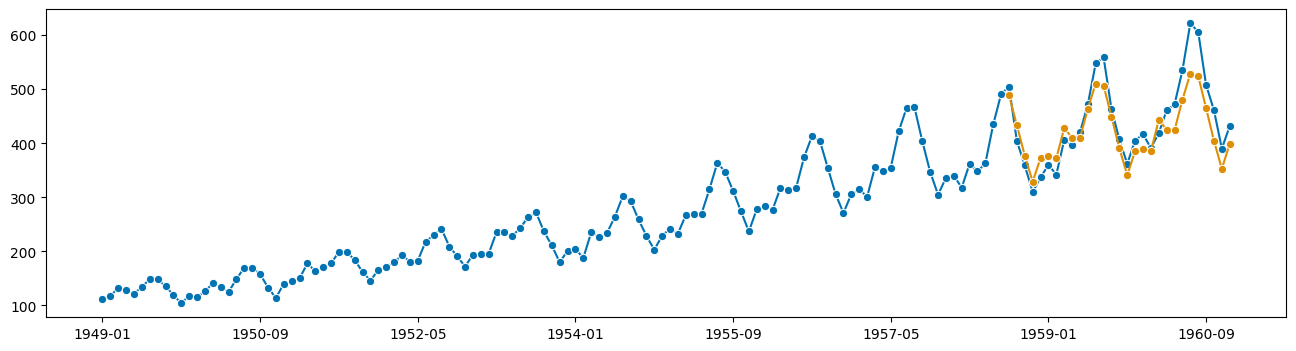

In [ ]:
y_pred = forecaster.predict(fh)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mape, '\n')
plot_series(y, y_pred)

###**Traffic Forecast**

In [ ]:
# https://www.kaggle.com/datasets/fedesoriano/traffic-prediction-dataset
traffic = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dave/traffic.csv", parse_dates=[0], index_col=[0])
print(traffic.head(),'\n','================================================')
traffic = traffic.pivot(columns="Junction", values="Vehicles")
print(traffic.head(),'\n',)
print(traffic.tail())

                     Junction  Vehicles           ID
DateTime                                            
2015-11-01 00:00:00         1        15  20151101001
2015-11-01 01:00:00         1        13  20151101011
2015-11-01 02:00:00         1        10  20151101021
2015-11-01 03:00:00         1         7  20151101031
2015-11-01 04:00:00         1         9  20151101041 
Junction                1    2    3   4
DateTime                               
2015-11-01 00:00:00  15.0  6.0  9.0 NaN
2015-11-01 01:00:00  13.0  6.0  7.0 NaN
2015-11-01 02:00:00  10.0  5.0  5.0 NaN
2015-11-01 03:00:00   7.0  6.0  1.0 NaN
2015-11-01 04:00:00   9.0  7.0  2.0 NaN 

Junction                 1     2     3     4
DateTime                                    
2017-06-30 19:00:00  105.0  34.0  33.0  11.0
2017-06-30 20:00:00   96.0  35.0  31.0  30.0
2017-06-30 21:00:00   90.0  31.0  28.0  16.0
2017-06-30 22:00:00   84.0  29.0  26.0  22.0
2017-06-30 23:00:00   78.0  27.0  39.0  12.0


In [ ]:
#===== Plot Settings =========
import matplotlib as mpl
from cycler import cycler

colors = cycler(color=plt.get_cmap("tab10").colors)  # ["b", "r", "g"]
# colors = cycler(color=["#282782", "r", "g"])

mpl.style.use("ggplot")
mpl.rcParams["figure.figsize"] = (20, 5)
mpl.rcParams["axes.facecolor"] = "white"
mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "lightgray"
mpl.rcParams["axes.prop_cycle"] = colors
mpl.rcParams["axes.linewidth"] = 1
mpl.rcParams["xtick.color"] = "black"
mpl.rcParams["ytick.color"] = "black"
mpl.rcParams["font.size"] = 12
mpl.rcParams["figure.titlesize"] = 25
mpl.rcParams["figure.dpi"] = 100

<Axes: xlabel='DateTime'>

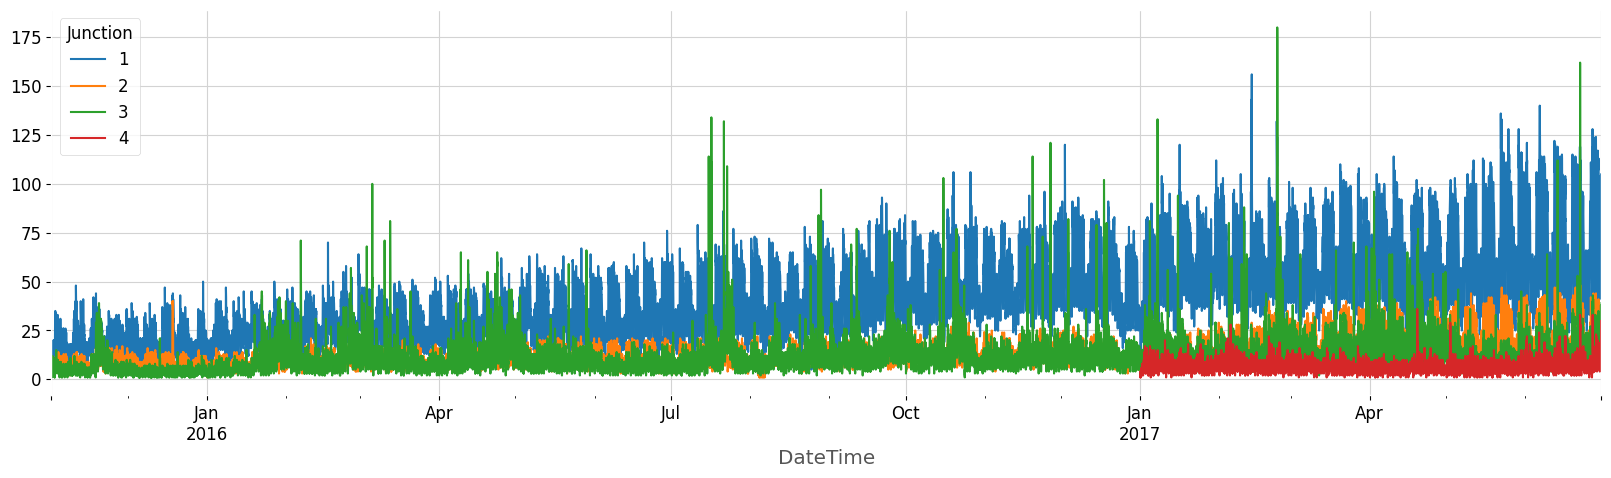

In [ ]:
traffic.plot()

In [ ]:
forecast_df = traffic.resample(rule='D').sum() # D=Day, M=Month, Y=Year, H=Hour, W=Week
forecaster = Prophet()
horizon = 30 #Predict 30 days into the Future
df = forecast_df[1] #just the first column for now

In [ ]:
forecast_df.index

DatetimeIndex(['2015-11-01', '2015-11-02', '2015-11-03', '2015-11-04',
               '2015-11-05', '2015-11-06', '2015-11-07', '2015-11-08',
               '2015-11-09', '2015-11-10',
               ...
               '2017-06-21', '2017-06-22', '2017-06-23', '2017-06-24',
               '2017-06-25', '2017-06-26', '2017-06-27', '2017-06-28',
               '2017-06-29', '2017-06-30'],
              dtype='datetime64[ns]', name='DateTime', length=608, freq='D')

In [ ]:
y_train = df[:-horizon] #take all but the number specified in the horizon
y_test = df.tail(horizon) # last 30 observations

In [ ]:
forecaster.fit(y_train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1d20bkko/6445bvhc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1d20bkko/4odglkdb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22300', 'data', 'file=/tmp/tmp1d20bkko/6445bvhc.json', 'init=/tmp/tmp1d20bkko/4odglkdb.json', 'output', 'file=/tmp/tmp1d20bkko/prophet_modeljvh8fa5z/prophet_model-20240325174304.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:43:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:43:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet()

In [ ]:
# is_relative=True: This indicates that the values in the index are relative, meaning they represent offsets from a reference point. For example,
# if you have a time series with a daily frequency, and the index values are [0, 1, 2, ...], they represent the number of days elapsed since the start of the time series.
# is_relative=False: This indicates that the values in the index are absolute, meaning they represent specific timestamps. For example,
# if you have a time series with a daily frequency, and the index values are [2024-01-01, 2024-01-02, 2024-01-03, ...], they represent the exact dates.
fh = ForecastingHorizon(y_test.index, is_relative=False)
fh

ForecastingHorizon(['2017-06-01', '2017-06-02', '2017-06-03', '2017-06-04',
               '2017-06-05', '2017-06-06', '2017-06-07', '2017-06-08',
               '2017-06-09', '2017-06-10', '2017-06-11', '2017-06-12',
               '2017-06-13', '2017-06-14', '2017-06-15', '2017-06-16',
               '2017-06-17', '2017-06-18', '2017-06-19', '2017-06-20',
               '2017-06-21', '2017-06-22', '2017-06-23', '2017-06-24',
               '2017-06-25', '2017-06-26', '2017-06-27', '2017-06-28',
               '2017-06-29', '2017-06-30'],
              dtype='datetime64[ns]', name='DateTime', freq='D', is_relative=False)

In [ ]:
y_pred = forecaster.predict(fh) # Forecaster = Prophet()

In [ ]:
#Confidence Interval
ci = forecaster.predict_interval(fh, coverage=0.9)
ci.head()

1             
                    0.9             
                  lower        upper
2017-06-01  1609.511015  1967.941782
2017-06-02  1533.947697  1906.803764
2017-06-03  1250.667751  1608.619406
2017-06-04  1213.142986  1593.824611
2017-06-05  1620.542865  1972.661778

In [ ]:
y_true = df.tail(horizon)
mae = mean_absolute_error(y_true, y_pred)
mae

184.30375410883354

Error of 184 vehicles a day.

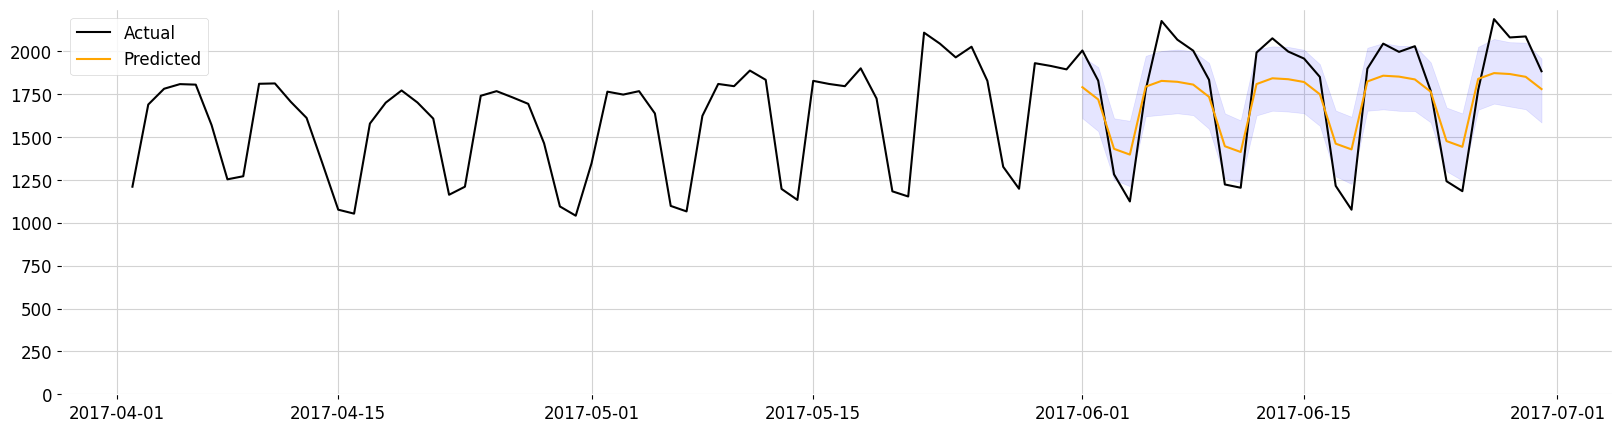

In [ ]:
plt.plot(
    df.tail(horizon * 3),
    # df.tail(horizon),
    label="Actual",
    color="black",
)
plt.gca().fill_between(
    ci.index, (ci.iloc[:, 0]), (ci.iloc[:, 1]), color="b", alpha=0.1
)
plt.plot(y_pred, label="Predicted", color="orange")
# plt.title(
#     f"{horizon} day forecast for {col} (mae: {round(mae, 2)}, confidence: {confidence*100}%)"
# )
plt.ylim(bottom=0)
plt.legend()
# plt.grid(False)
plt.show()

The predicted line is not perfect, but it follows the weekly trend as seen in the traffic data

In [ ]:
forecaster = Prophet()
forecaster.fit(df)

last_date = df.index.max()
fh = ForecastingHorizon(
    pd.date_range(str(last_date), periods=horizon, freq="D"),
    is_relative=False,
)

y_pred = forecaster.predict(fh)
ci = forecaster.predict_interval(fh, coverage=0.9).astype("float")

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1d20bkko/t70ii7a7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1d20bkko/bwaz5fuu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30393', 'data', 'file=/tmp/tmp1d20bkko/t70ii7a7.json', 'init=/tmp/tmp1d20bkko/bwaz5fuu.json', 'output', 'file=/tmp/tmp1d20bkko/prophet_modelb82cq70b/prophet_model-20240325181816.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:18:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:18:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


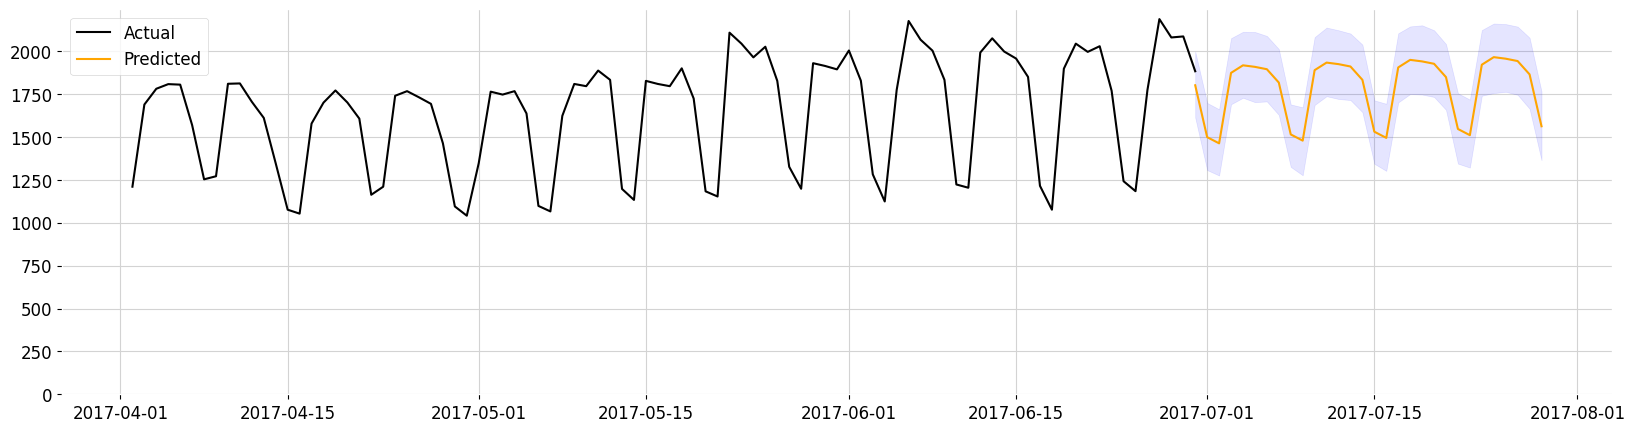

In [ ]:
plt.plot(
    df.tail(horizon * 3),
    # df.tail(horizon),
    label="Actual",
    color="black",
)
plt.gca().fill_between(
    ci.index, (ci.iloc[:, 0]), (ci.iloc[:, 1]), color="b", alpha=0.1
)
plt.plot(y_pred, label="Predicted", color="orange")
# plt.title(
#     f"{horizon} day forecast for {col} (mae: {round(mae, 2)}, confidence: {confidence*100}%)"
# )
plt.ylim(bottom=0)
plt.legend()
# plt.grid(False)
plt.show()

In [ ]:
# The Function can take any time series dataset as an input, and the horizon and forecaster,
# will do all the calculations, and validate the result. Also, the validation parameter when set
# to false, it will make predictions beyond the dataset into the future; and when it is ture, it will
# use the train_test_split and you can calculate an error metric.
def sktime_forecast(dataset, horizon, forecaster, validation=False, confidence=0.9, frequency="D"):
    """Loop over a time series dataframe, train an sktime forecasting model, and visualize the results.

    Args:
        dataset (pd.DataFrame): Input time series DataFrame with datetime index
        horizon (int): Forecast horizon
        forecaster (sktime.forecasting): Configured forecaster
        validation (bool, optional): . Defaults to False.
        confidence (float, optional): Confidence level. Defaults to 0.9.
        frequency (str, optional): . Defaults to "D".
    """

    # Adjust frequency
    forecast_df = dataset.resample(rule=frequency).sum()

    # Interpolate missing periods (if any)
    forecast_df = forecast_df.interpolate(method="time")

    for col in dataset.columns:

        # Use train/test split to validate forecaster
        if validation:
            df = forecast_df[col]

            y_train = df[:-horizon]
            y_test = df.tail(horizon)

            forecaster.fit(y_train)
            fh = ForecastingHorizon(y_test.index, is_relative=False)
            y_pred = forecaster.predict(fh)
            ci = forecaster.predict_interval(fh, coverage=confidence).astype("float")
            y_true = df.tail(horizon)

            mae = mean_absolute_error(y_true, y_pred)

        # Make predictions beyond the dataset
        if not validation:
            df = forecast_df[col].dropna()
            forecaster.fit(df)

            last_date = df.index.max()
            fh = ForecastingHorizon(
                pd.date_range(str(last_date), periods=horizon, freq=frequency),
                is_relative=False,
            )
            y_pred = forecaster.predict(fh)
            ci = forecaster.predict_interval(fh, coverage=confidence).astype("float")
            mae = np.nan

        # Visualize results
        plt.plot(
            df.tail(horizon * 3),
            # df.tail(horizon),
            label="Actual",
            color="black",
        )
        plt.gca().fill_between(
            ci.index, (ci.iloc[:, 0]), (ci.iloc[:, 1]), color="b", alpha=0.1
        )
        plt.plot(y_pred, label="Predicted", color="Orange")
        plt.title(
            f"{horizon} day forecast for Column {col} (mae: {round(mae, 2)}, confidence: {confidence*100}%)"
        )
        plt.ylim(bottom=0)
        plt.legend()
        plt.grid(True)
        plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1d20bkko/h4w7ecag.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1d20bkko/zjydc0sy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23464', 'data', 'file=/tmp/tmp1d20bkko/h4w7ecag.json', 'init=/tmp/tmp1d20bkko/zjydc0sy.json', 'output', 'file=/tmp/tmp1d20bkko/prophet_modellotkndqv/prophet_model-20240325183627.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:36:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:36:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


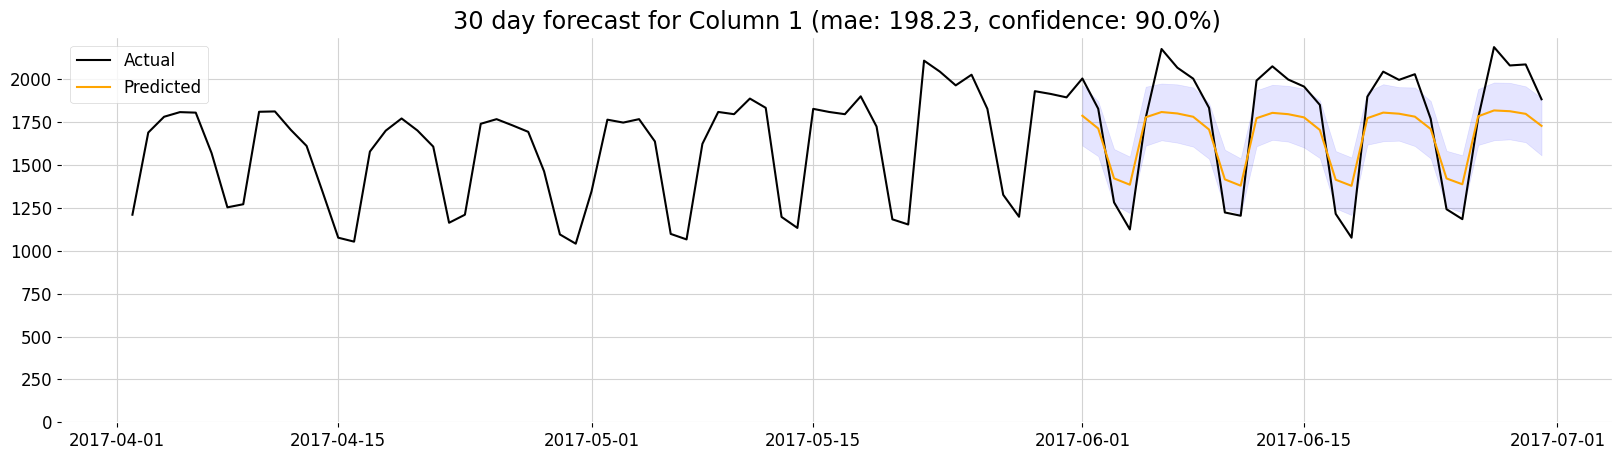

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1d20bkko/vw0txhk4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1d20bkko/6g7o5pmk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4918', 'data', 'file=/tmp/tmp1d20bkko/vw0txhk4.json', 'init=/tmp/tmp1d20bkko/6g7o5pmk.json', 'output', 'file=/tmp/tmp1d20bkko/prophet_modelqn6hw760/prophet_model-20240325183628.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:36:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:36:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


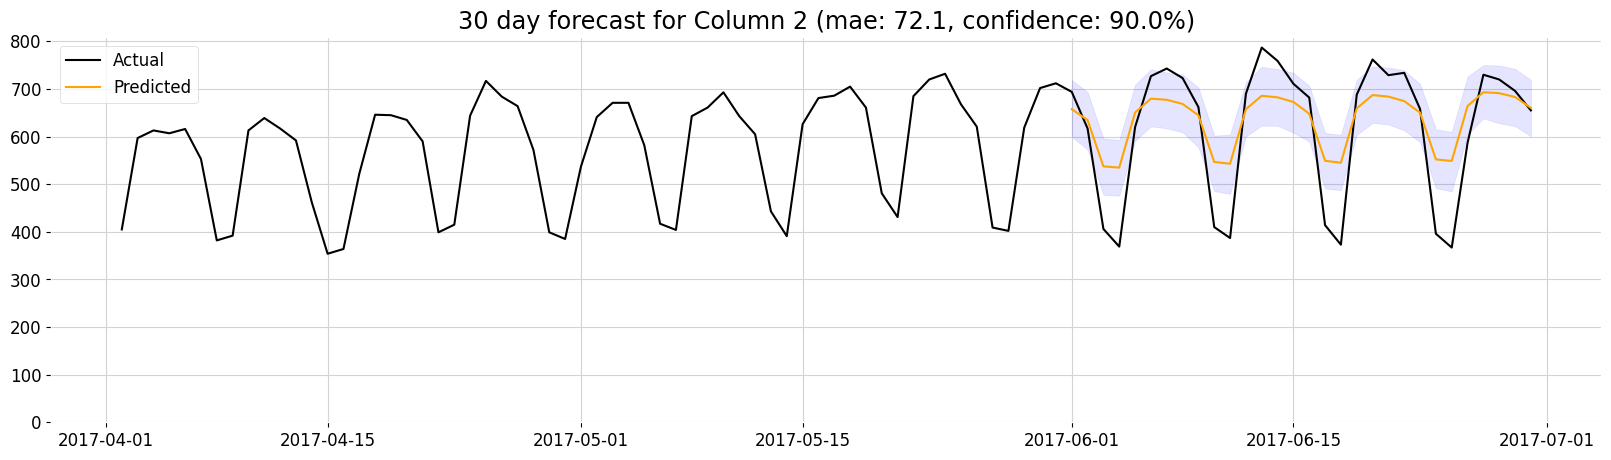

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1d20bkko/om6pj0xp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1d20bkko/e6437bi_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36456', 'data', 'file=/tmp/tmp1d20bkko/om6pj0xp.json', 'init=/tmp/tmp1d20bkko/e6437bi_.json', 'output', 'file=/tmp/tmp1d20bkko/prophet_model0r_r_eev/prophet_model-20240325183628.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:36:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:36:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


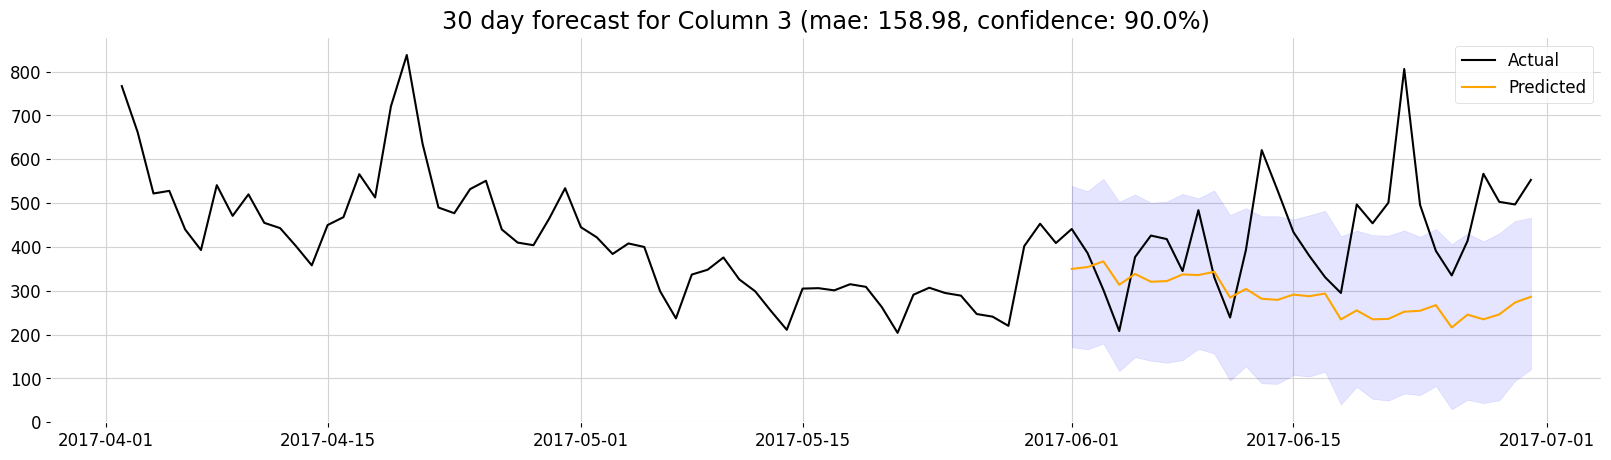

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1d20bkko/4y1j8ill.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1d20bkko/6q4e4q5a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43814', 'data', 'file=/tmp/tmp1d20bkko/4y1j8ill.json', 'init=/tmp/tmp1d20bkko/6q4e4q5a.json', 'output', 'file=/tmp/tmp1d20bkko/prophet_modelxznhcgic/prophet_model-20240325183629.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:36:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:36:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


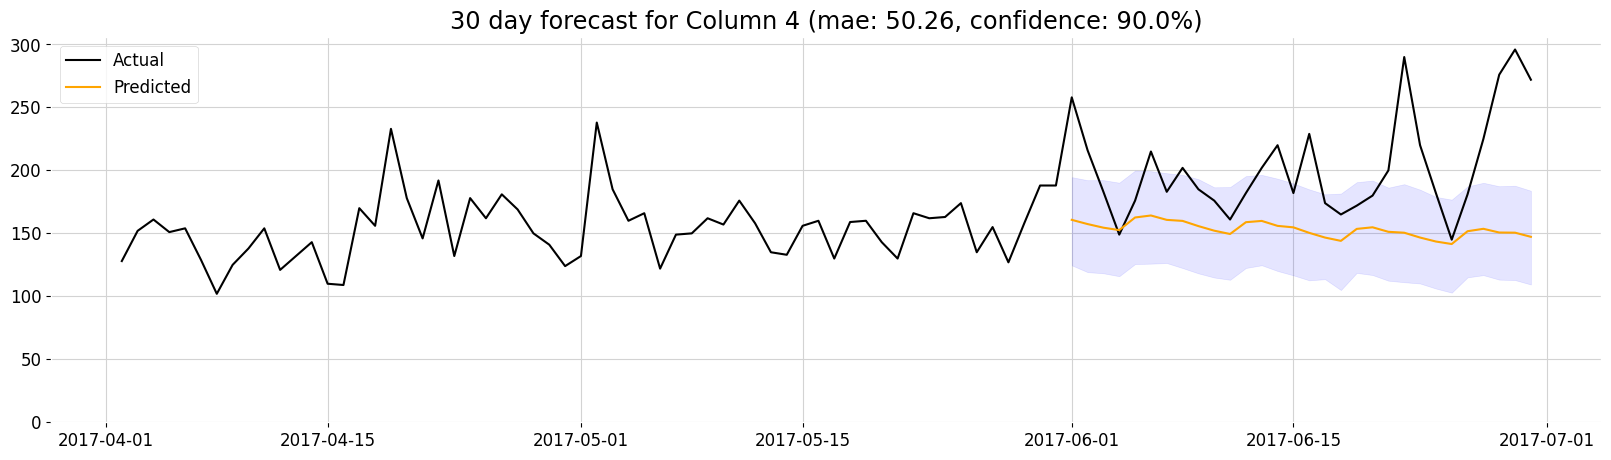

In [ ]:
forecaster = Prophet(yearly_seasonality=True, weekly_seasonality=True)
sktime_forecast(dataset=traffic, horizon=30, forecaster=forecaster, validation=True)

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.2 MB/s eta 0:00:00


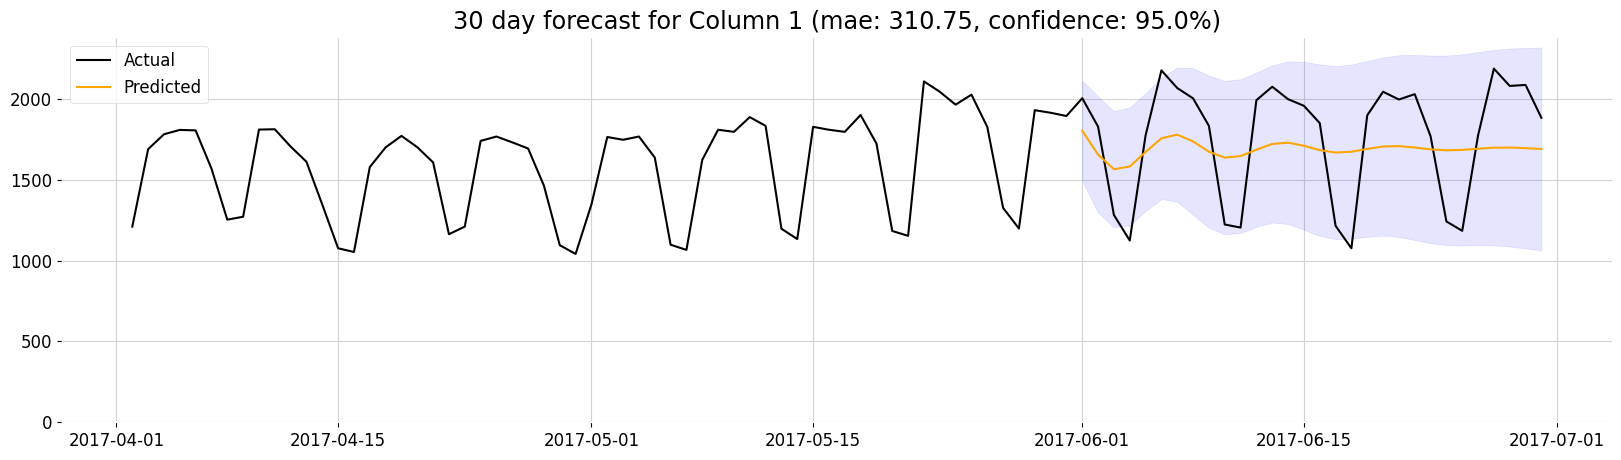

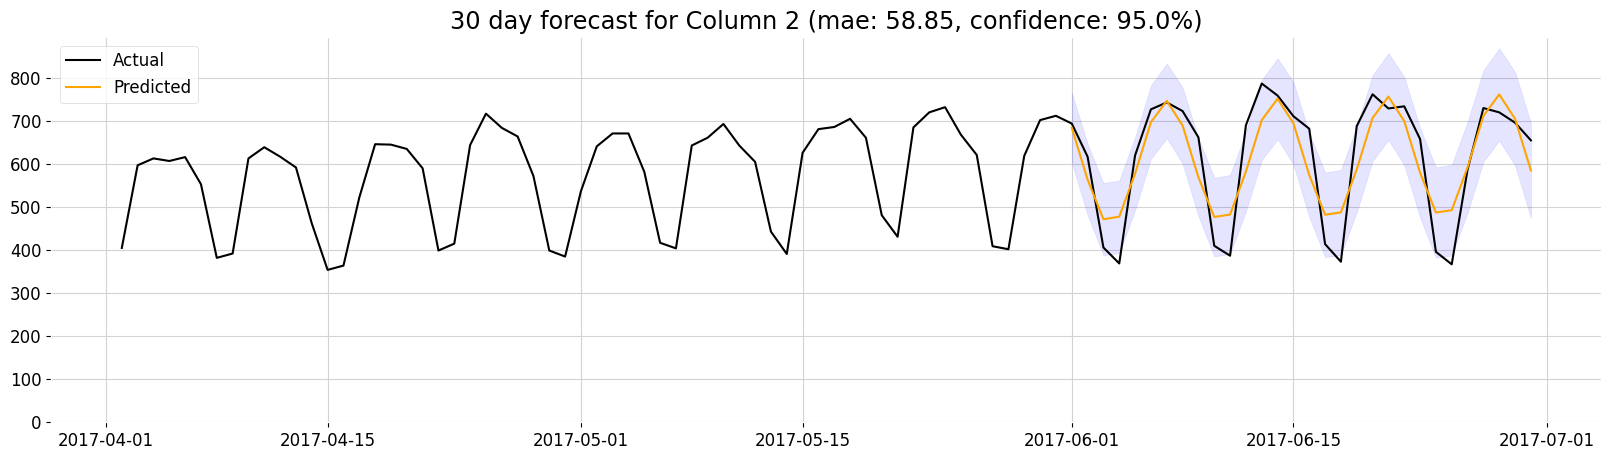

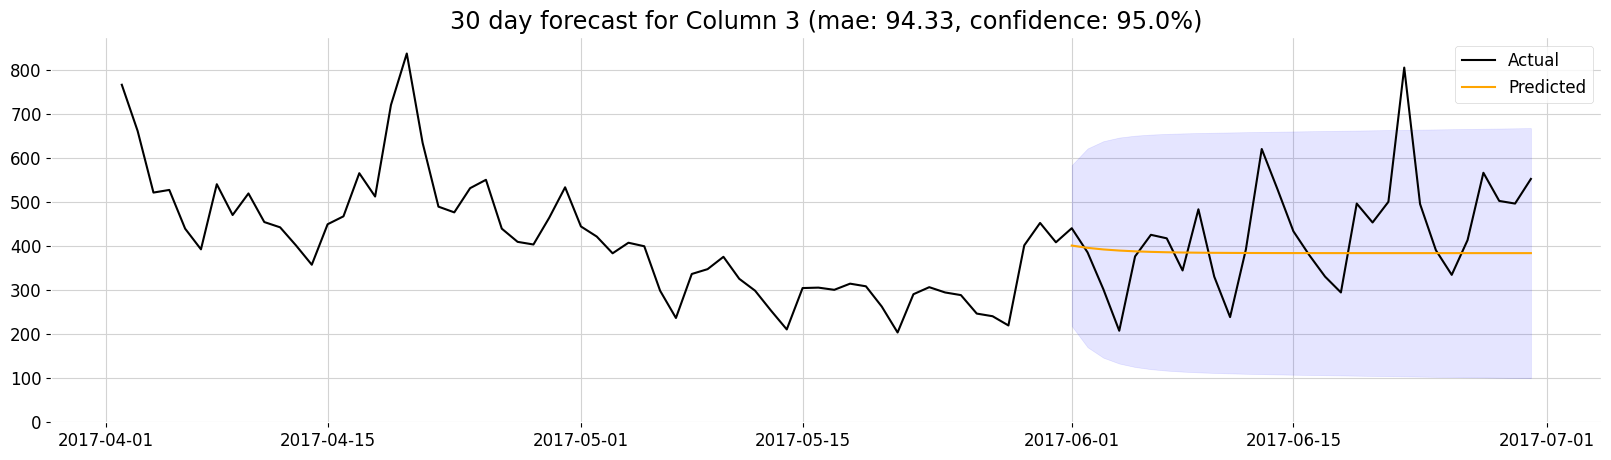

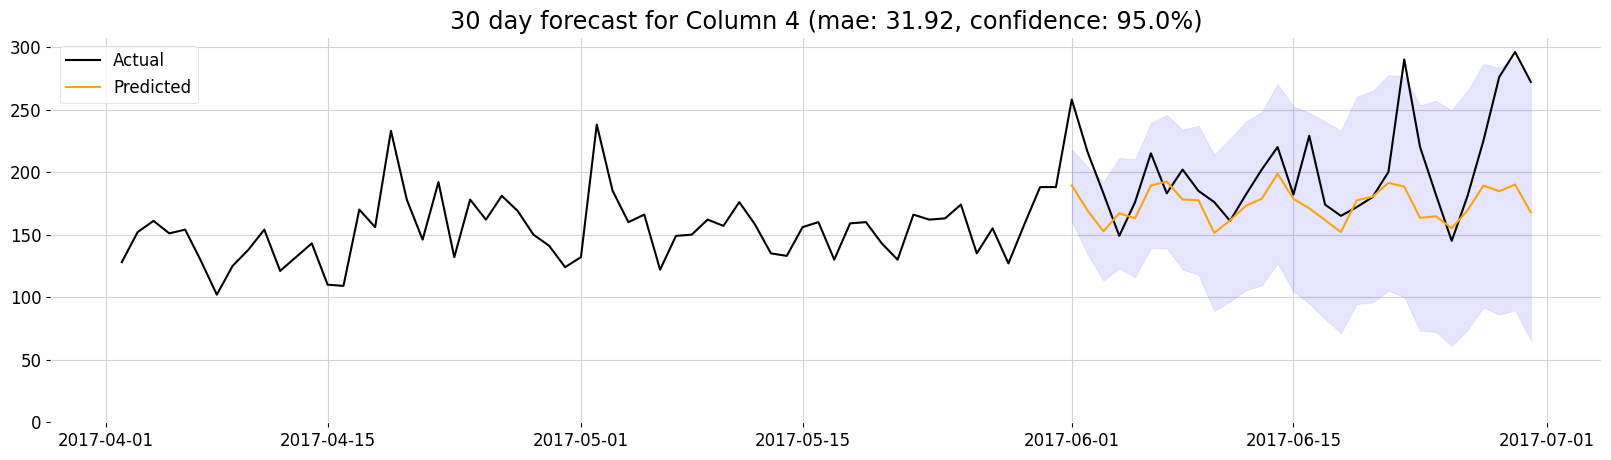

In [ ]:
forecaster = AutoARIMA(sp=1, suppress_warnings=True)
sktime_forecast(dataset=traffic, horizon=30, forecaster=forecaster, validation=True, confidence=0.95)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1d20bkko/fduuo1ho.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1d20bkko/to4l1gcp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57071', 'data', 'file=/tmp/tmp1d20bkko/fduuo1ho.json', 'init=/tmp/tmp1d20bkko/to4l1gcp.json', 'output', 'file=/tmp/tmp1d20bkko/prophet_modelt4amqvuk/prophet_model-20240325185115.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:51:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:51:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


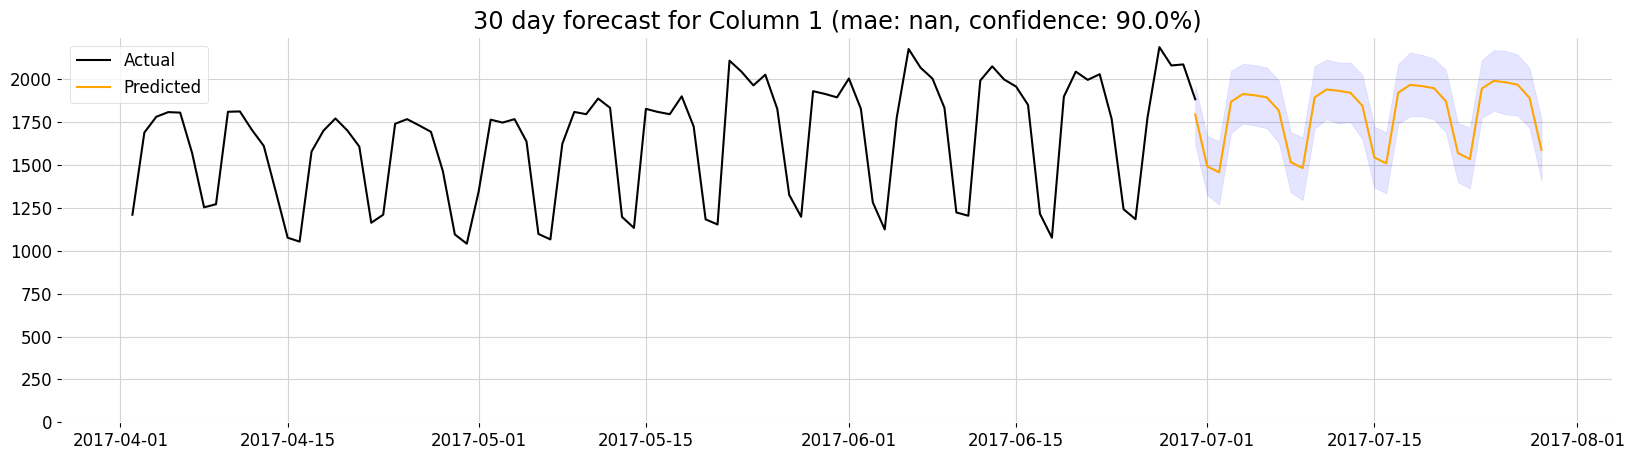

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1d20bkko/fjamrntm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1d20bkko/39647h35.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14010', 'data', 'file=/tmp/tmp1d20bkko/fjamrntm.json', 'init=/tmp/tmp1d20bkko/39647h35.json', 'output', 'file=/tmp/tmp1d20bkko/prophet_modelbuvhruyz/prophet_model-20240325185117.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:51:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:51:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


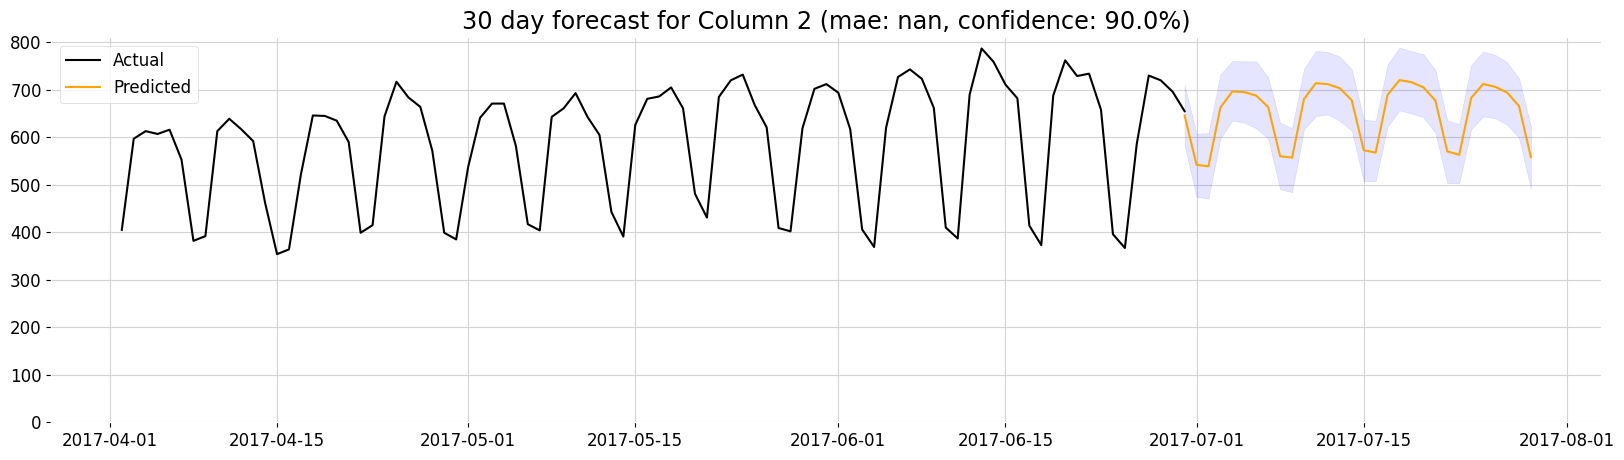

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1d20bkko/e2hz8kaq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1d20bkko/95etp2z2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57230', 'data', 'file=/tmp/tmp1d20bkko/e2hz8kaq.json', 'init=/tmp/tmp1d20bkko/95etp2z2.json', 'output', 'file=/tmp/tmp1d20bkko/prophet_modelswa_fy_2/prophet_model-20240325185119.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:51:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:51:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


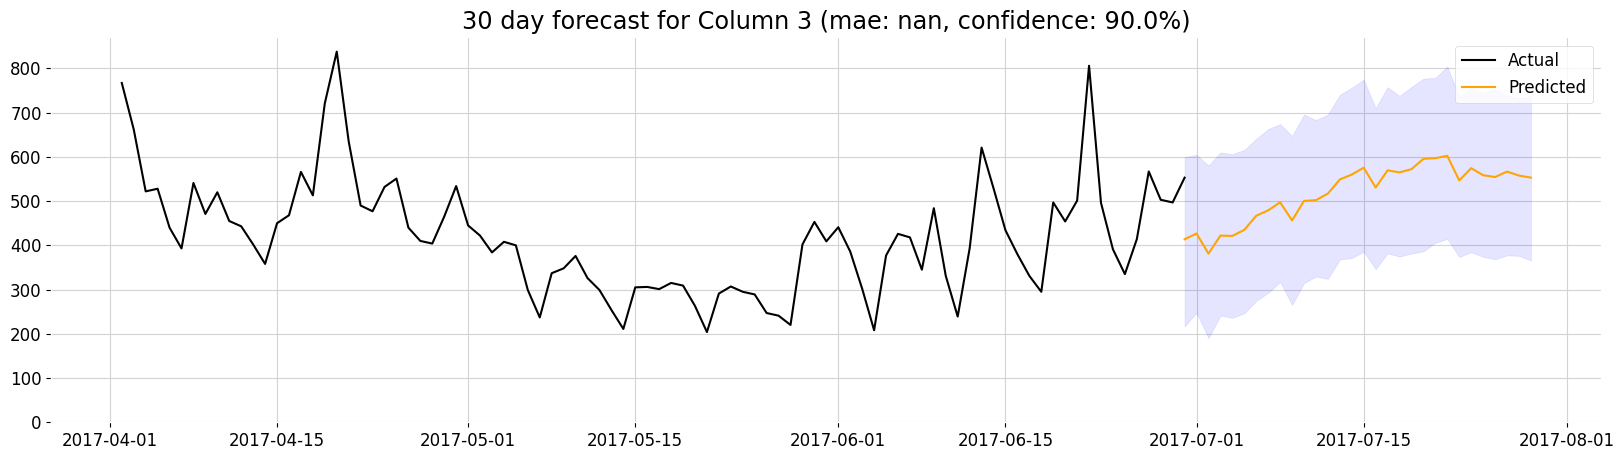

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1d20bkko/rgnbgnc9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1d20bkko/g704fs1d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21614', 'data', 'file=/tmp/tmp1d20bkko/rgnbgnc9.json', 'init=/tmp/tmp1d20bkko/g704fs1d.json', 'output', 'file=/tmp/tmp1d20bkko/prophet_modell4inl181/prophet_model-20240325185120.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:51:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:51:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


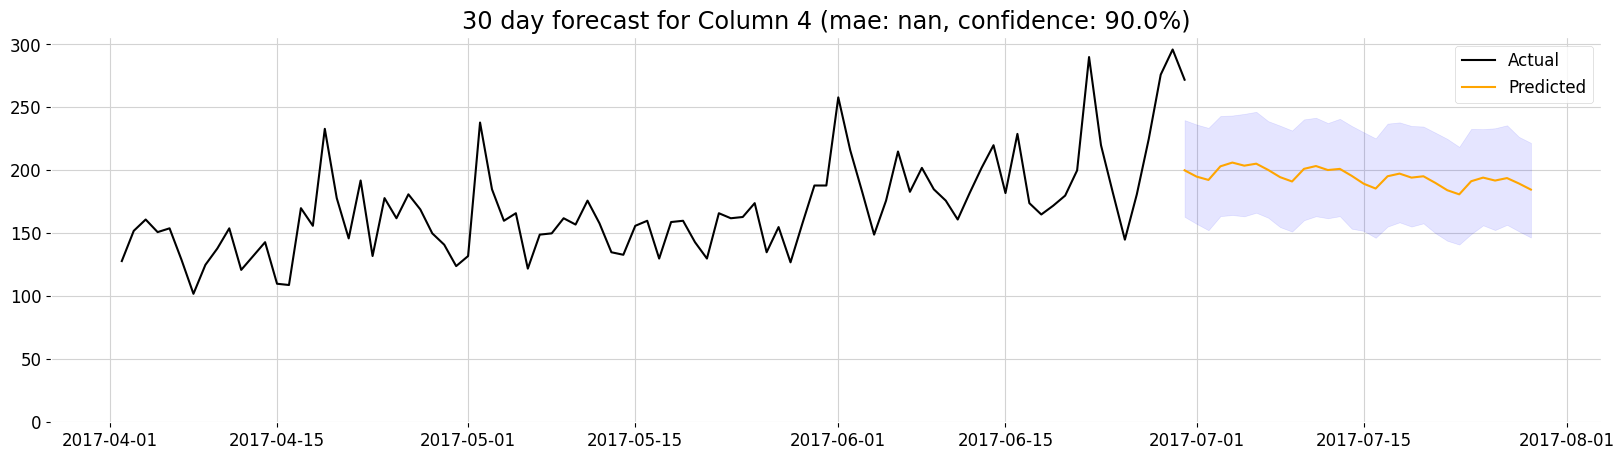

In [ ]:
forecaster = Prophet(yearly_seasonality=True, weekly_seasonality=True)
sktime_forecast(dataset=traffic, horizon=30, forecaster=forecaster, validation=False)

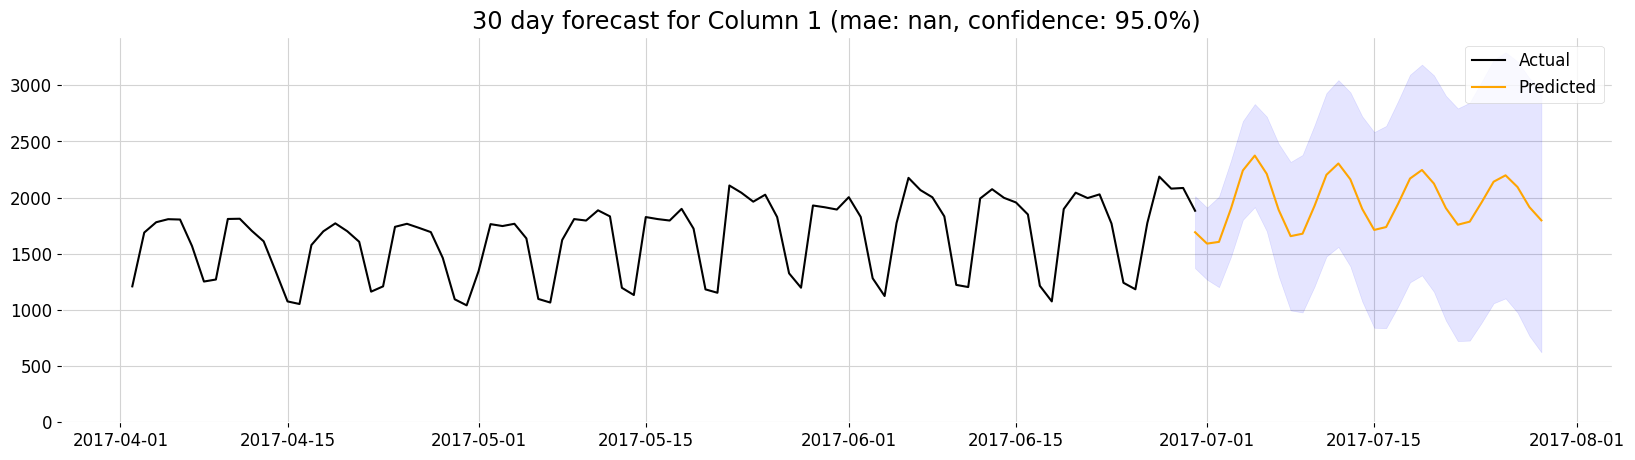

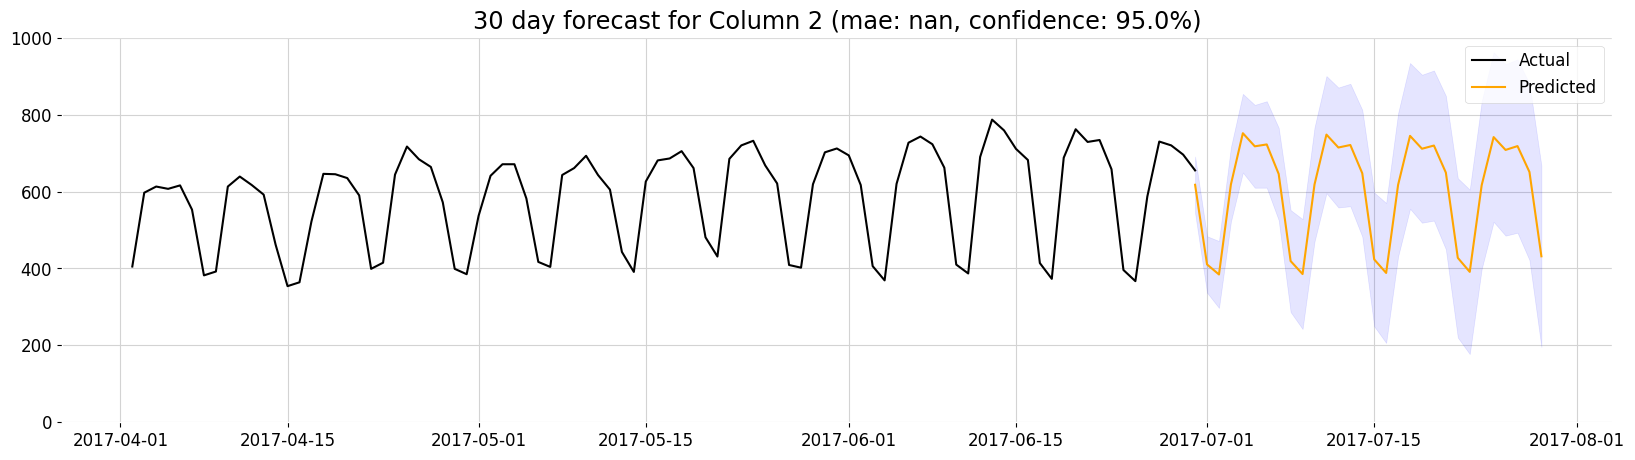

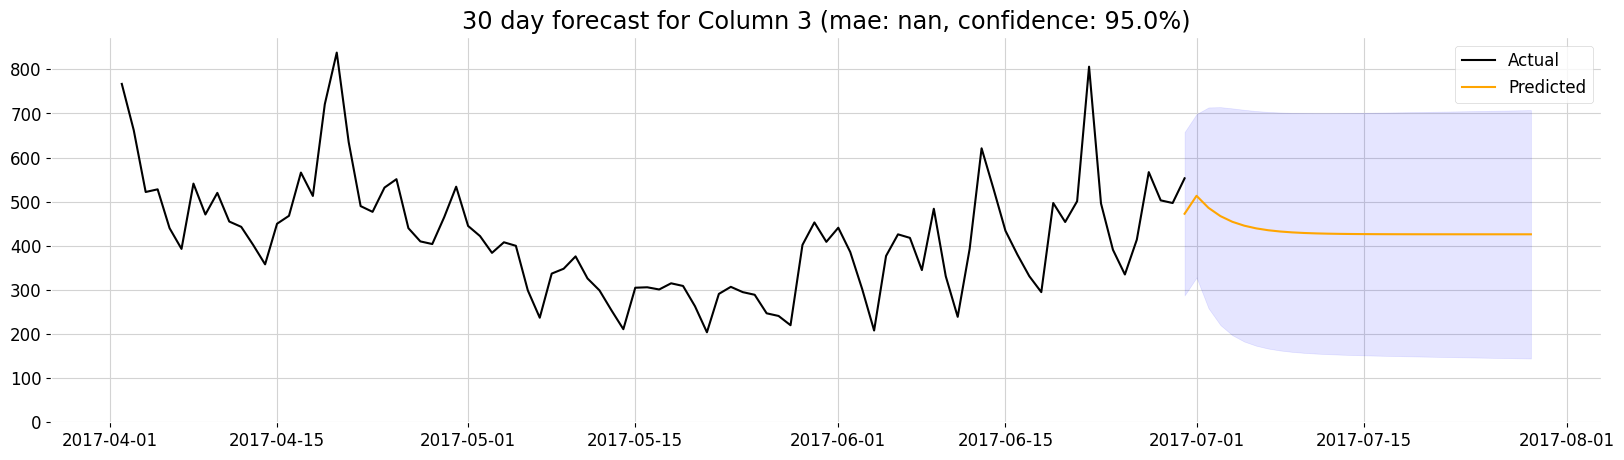

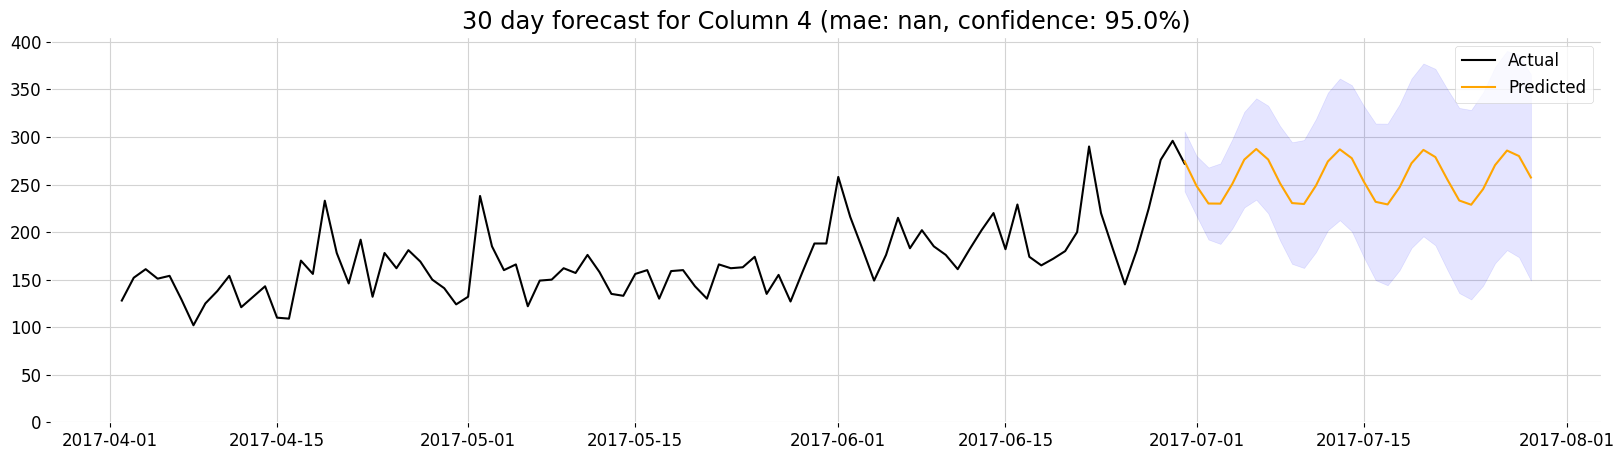

In [ ]:
forecaster = AutoARIMA(sp=1, suppress_warnings=True)
sktime_forecast(dataset=traffic, horizon=30, forecaster=forecaster, validation=False, confidence=0.95)